# Problema de Coloração de Grafos

O problema de coloração de grafos é um tópico clássico em teoria dos grafos, que envolve a atribuição de cores aos vértices de um grafo de tal maneira que nenhum par de vértices adjacentes (isto é, conectados por uma aresta) compartilhe a mesma cor. O objetivo é minimizar o número de cores utilizadas, onde o número mínimo de cores necessárias para colorir um grafo sem violar a condição de adjacência é conhecido como o número cromático desse grafo.

Resolver o problema de coloração de grafos pode ser desafiador, especialmente à medida que o tamanho do grafo e a complexidade das restrições aumentam. O caso geral do problema é NP-Completo, o que significa que não se conhece um algoritmo eficiente (polinomial) que possa resolver todas as instâncias do problema. Portanto, o foco muitas vezes se volta para o desenvolvimento de heurísticas, algoritmos aproximados ou métodos específicos do domínio que podem encontrar soluções aceitáveis em um tempo razoável para grafos práticos de interesse.

#### Definição de uma instância do problema

Grafo Original (Sem cores):


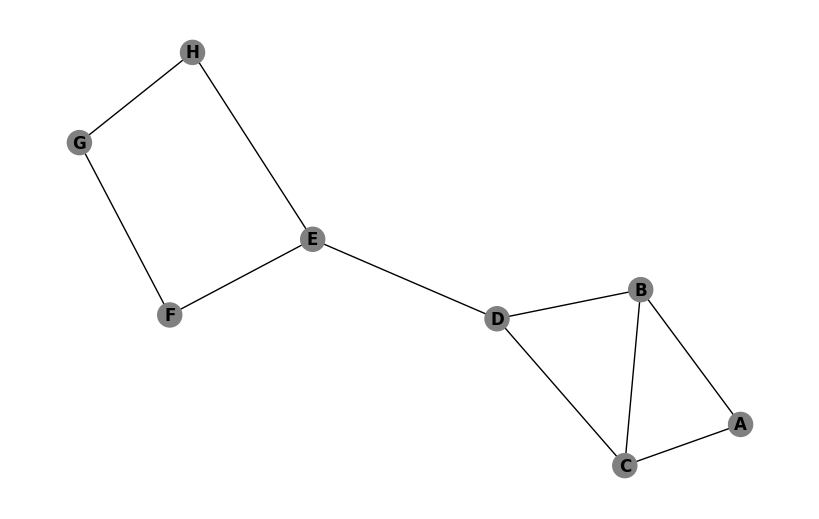

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Criando um grafo exemplo
graph = nx.Graph()
edges = [('A', 'B'), ('A', 'C'), ('B', 'C'), ('B', 'D'), ('C', 'D'), ('D', 'E'), ('E', 'F'), ('F', 'G'), ('G', 'H'), ('H', 'E')]
graph.add_edges_from(edges)

# Gera posições para plotagem dos gráficos
pos = nx.spring_layout(graph)

# Função para desenhar o grafo
def plot_graph(graph, colors=None):
    plt.figure(figsize=(8,5))
    color_map = colors if colors else ['gray' for _ in range(len(graph.nodes()))]
    nx.draw(graph, pos, node_color=color_map, with_labels=True, font_weight='bold')
    plt.show()

print("Grafo Original (Sem cores):")
plot_graph(graph)


#### CSP na solução do problema de coloração de Grafos

Grafo Colorido com Sucesso:


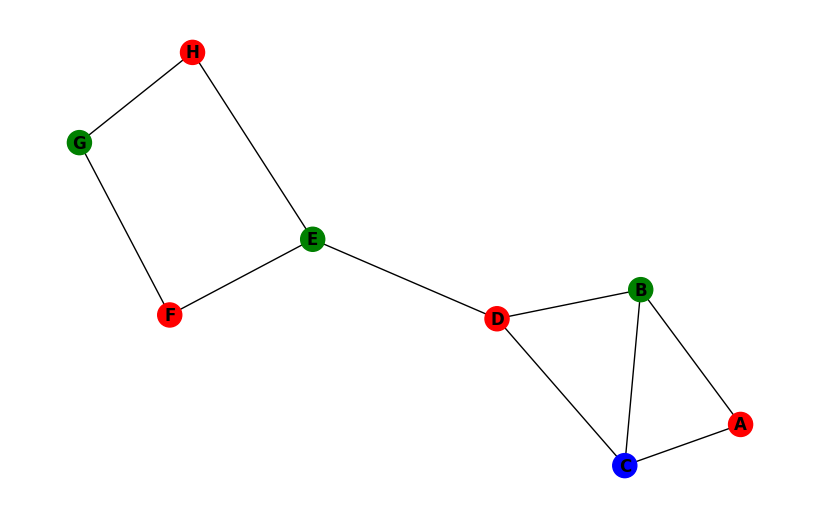

In [2]:
def assign_colors(graph, node, colors, color_options):
    # Se todos os nós foram processados, retornar True
    if node == len(graph.nodes):
        return True

    for color in color_options:
        # Verificar se a cor atual é segura para o nó
        if all(color != colors[neigh] for neigh in graph.neighbors(list(graph.nodes)[node])):
            colors[list(graph.nodes)[node]] = color
            if assign_colors(graph, node + 1, colors, color_options):
                return True
            colors[list(graph.nodes)[node]] = None  # Backtracking

    return False

# Inicializando as cores dos nodos como None
colors = {node: None for node in graph.nodes()}

# Definindo opções de cores
color_options = ['red', 'green', 'blue', 'yellow']

# Tentando colorir o grafo
if assign_colors(graph, 0, colors, color_options):
    print("Grafo Colorido com Sucesso:")
    # Mapeando cores para a visualização
    color_map = [colors[node] for node in graph.nodes()]
    plot_graph(graph, color_map)
else:
    print("Não foi possível colorir o grafo com as cores fornecidas.")


Grafo colorido com sucesso usando CSP.


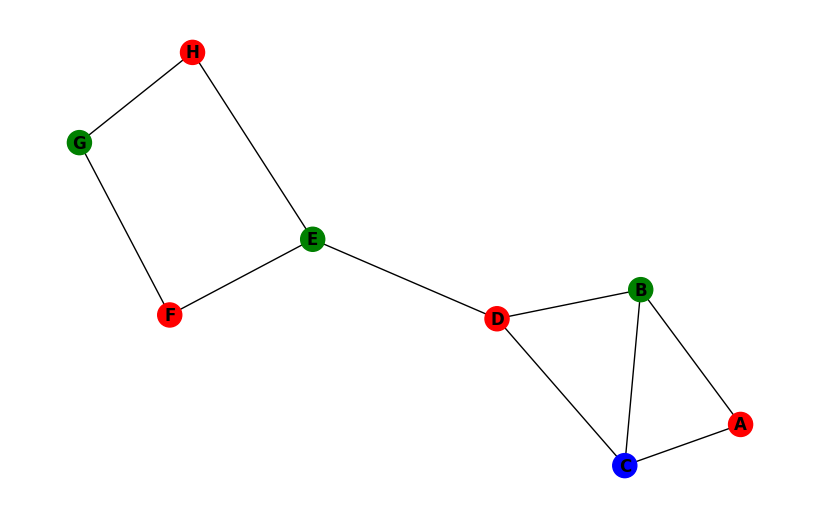

In [3]:
def csp_coloring(graph):
    # Definindo as cores
    colors = ['Red', 'Green', 'Blue', 'Yellow']
    
    # Função para checar se a cor atual é válida
    def is_valid(node, color, assignment):
        for neighbor in graph.neighbors(node):
            if neighbor in assignment and assignment[neighbor] == color:
                return False
        return True

    # Função recursiva para tentar colorir o grafo
    def solve_csp(node):
        if node == len(graph.nodes):
            return True
        
        current_node = list(graph.nodes)[node]
        for color in colors:
            if is_valid(current_node, color, node_colors):
                node_colors[current_node] = color
                if solve_csp(node + 1):
                    return True
                node_colors[current_node] = None
        return False
    
    node_colors = {}
    if solve_csp(0):
        return node_colors
    else:
        return None

# Reinicializando o grafo para garantir consistência
graph = nx.Graph()
graph.add_edges_from(edges)

# Chamando a função de coloração CSP
solution = csp_coloring(graph)

if solution:
    print("Grafo colorido com sucesso usando CSP.")
    # Convertendo as cores atribuídas para a visualização
    color_map = [solution[node] for node in graph.nodes()]
    plot_graph(graph, color_map)
else:
    print("Não foi possível colorir o grafo com as cores disponíveis.")
